In [27]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [28]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [29]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [31]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [41]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 250s 3s/step - loss: 1.7117 - accuracy: 0.3133 - val_loss: 1.3563 - val_accuracy: 0.3639
Epoch 2/20
83/83 [==============================] - 250s 3s/step - loss: 1.1439 - accuracy: 0.4972 - val_loss: 1.0253 - val_accuracy: 0.5238
Epoch 3/20
83/83 [==============================] - 247s 3s/step - loss: 0.9473 - accuracy: 0.5997 - val_loss: 1.0121 - val_accuracy: 0.5306
Epoch 4/20
83/83 [==============================] - 279s 3s/step - loss: 0.8528 - accuracy: 0.6277 - val_loss: 0.8812 - val_accuracy: 0.5884
Epoch 5/20
83/83 [==============================] - 290s 3s/step - loss: 0.7708 - accuracy: 0.6754 - val_loss: 0.7641 - val_accuracy: 0.6667
Epoch 6/20
83/83 [==============================] - 282s 3s/step - loss: 0.6859 - accuracy: 0.7234 - val_loss: 0.7729 - val_accuracy: 0.6599
Epoch 7/20
83/83 [==============================] - 294s 4s/step - loss: 0.6096 - accuracy: 0.7420 - val_loss: 0.6855 - val_accuracy: 0.6837
Epoch 8/20
83

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

e:\final year projects\medico - prathamesh website\medico\model\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


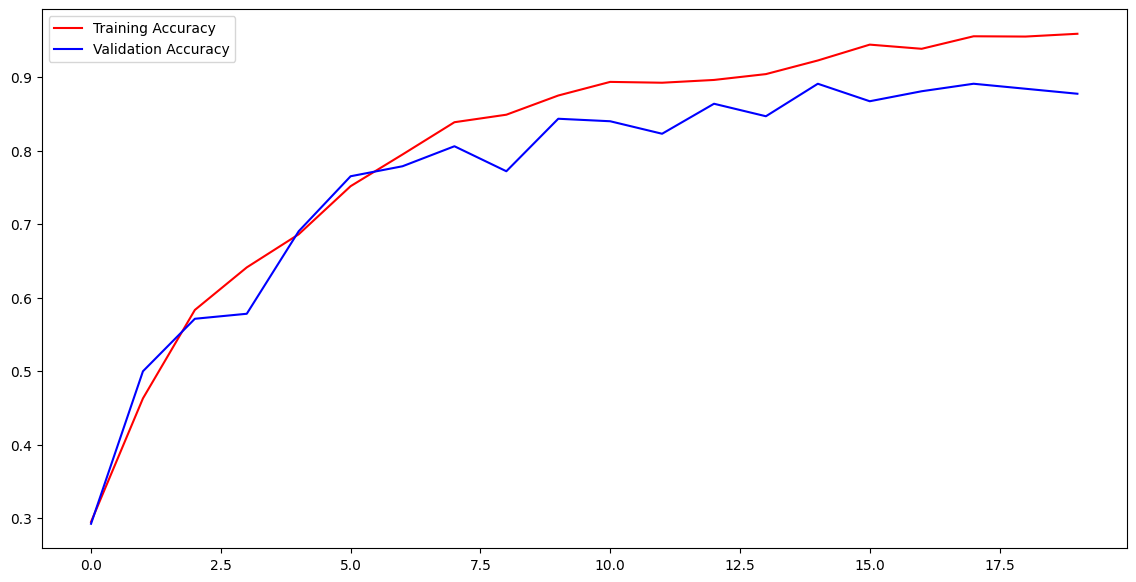

In [ ]:
# model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

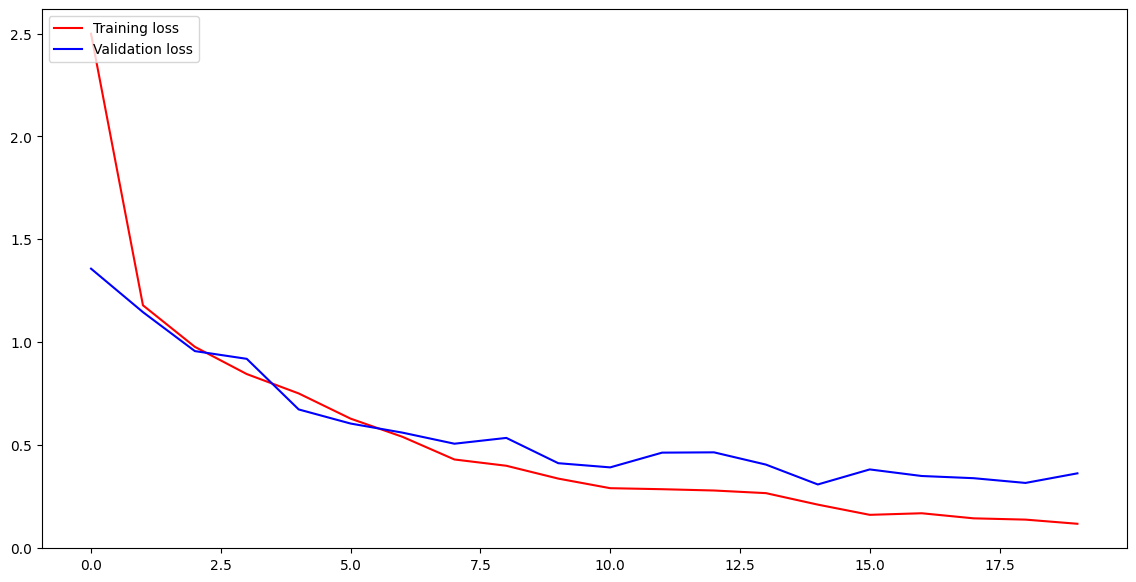

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [ ]:
img = cv2.imread('../data/Testing/pituitary_tumor/image(95).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

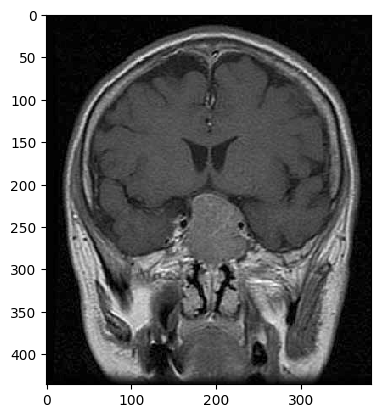

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../data/Testing/pituitary_tumor/image(95).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 298ms/step


3

In [ ]:
# import joblib

# joblib.dump(model, 'brain_tumor_model.joblib')

['brain_tumor_model.joblib']

In [42]:
import pickle

with open('brain_tumor_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('brain_tumor_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [43]:
import cv2, numpy as np

img = cv2.imread('../data/Testing/pituitary_tumor/image(95).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [44]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [45]:
a = loaded_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 305ms/step


3